In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
subdir = 'datasets/12-22-18-converted/'
ratings = pd.read_csv(subdir+'titles-rating.csv')

print('Length of file: %d'%len(ratings))
ratings.head()

Length of file: 900080


,tconst,averageRating,numVotes
0,tt0000001,5.8,1448
1,tt0000002,6.3,175
2,tt0000003,6.6,1048
3,tt0000004,6.4,105
4,tt0000005,6.2,1751


In [3]:
ratings.describe()

,averageRating,numVotes
count,900080.000000,9.000800e+05
mean,6.913745,9.639671e+02
std,1.402172,1.537908e+04
min,1.000000,5.000000e+00
25%,6.200000,9.000000e+00
50%,7.100000,2.000000e+01
75%,7.900000,7.600000e+01
max,10.000000,2.028472e+06


/Users/bradkittrell/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


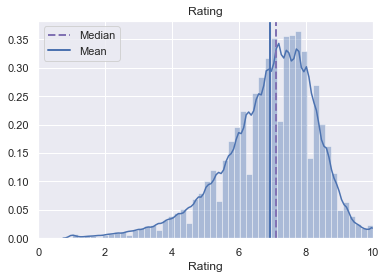

In [4]:
sns.set(style='darkgrid')
# Create a figure and axes. Then plot the data
median = ratings['averageRating'].median()
mean = ratings['averageRating'].mean()
fig, ax = plt.subplots()
sns.distplot(ratings['averageRating'], ax=ax)

# Customize the labels and limits
ax.set(xlabel="Rating", xlim=(0,10), title="Rating")

# Add vertical lines for the median and mean
ax.axvline(x=median, color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=mean, color='b', label='Mean', linestyle='-', linewidth=2)

# Show the legend and plot the data
ax.legend()
plt.show()

/Users/bradkittrell/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


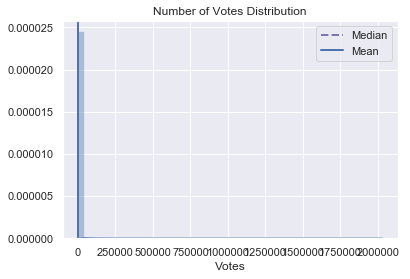

In [5]:
sns.set(style='darkgrid')
# Create a figure and axes. Then plot the data
median = ratings['numVotes'].median()
mean = ratings['numVotes'].mean()
fig, ax = plt.subplots()
sns.distplot(ratings['numVotes'], ax=ax)

# Customize the labels and limits
ax.set(xlabel="Votes", title="Number of Votes Distribution")

# Add vertical lines for the median and mean
ax.axvline(x=median, color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=mean, color='b', label='Mean', linestyle='-', linewidth=2)

# Show the legend and plot the data
ax.legend()
plt.show()

In [6]:
titles = pd.read_csv(subdir+'titles-genre.csv')
titles.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,Action,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,tt0003854,movie,Dodge City Trail,Dodge City Trail,0,1936.0,NaN,56.0,"Adventure,Music,Western",0,...,0,0,0,0,0,0,0,0,0,1
1,tt0005076,movie,Charley's Aunt,Charley's Aunt,0,1925.0,NaN,80.0,Comedy,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0005929,movie,The Prince of Pep,The Prince of Pep,0,1925.0,NaN,30.0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0006626,movie,Elnémult harangok,Elnémult harangok,0,1922.0,NaN,52.0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0010859,movie,A Tale of Two Worlds,A Tale of Two Worlds,0,1921.0,NaN,70.0,Drama,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
merged = pd.merge(titles,ratings,on='tconst',how='left')
merged = merged.dropna(subset=['averageRating','numVotes'])
merged['ln_votes'] = np.log(merged['numVotes'])
merged['ln_rating'] = np.log(merged['averageRating'])
bc, _ = stats.boxcox(merged['numVotes'])
merged['BC-Votes'] = bc
bc, _ = stats.boxcox(merged['averageRating'])
merged['BC-AvgRating'] = bc
merged = merged[merged['numVotes']>10000] #This was mostly exploratory to get to this number. it is arbitrary


/Users/bradkittrell/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


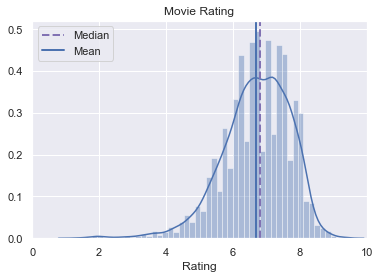

In [8]:
sns.set(style='darkgrid')
# Create a figure and axes. Then plot the data
median = merged['averageRating'].median()
mean = merged['averageRating'].mean()
fig, ax = plt.subplots()
sns.distplot(merged['averageRating'], ax=ax)

# Customize the labels and limits
ax.set(xlabel="Rating", xlim=(0,10), title="Movie Rating")

# Add vertical lines for the median and mean
ax.axvline(x=median, color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=mean, color='b', label='Mean', linestyle='-', linewidth=2)

# Show the legend and plot the data
ax.legend()
plt.show()

In [9]:
ratbyYear = merged.groupby(['startYear']).agg(['mean','median','std'])
ratbyYear = ratbyYear.set_axis([f"{x}-{y}" for x, y in ratbyYear.columns], axis=1, inplace=False)
ratbyYear.head()

,isAdult-mean,isAdult-median,isAdult-std,endYear-mean,endYear-median,endYear-std,runtimeMinutes-mean,runtimeMinutes-median,runtimeMinutes-std,Action-mean,...,ln_votes-std,ln_rating-mean,ln_rating-median,ln_rating-std,BC-Votes-mean,BC-Votes-median,BC-Votes-std,BC-AvgRating-mean,BC-AvgRating-median,BC-AvgRating-std
startYear,,,,,,,,,,,,,,,,,,,,,
1921.0,0,0,NaN,NaN,NaN,NaN,68.000000,68.0,NaN,0.0,...,NaN,2.116256,2.116256,NaN,4.693426,4.693426,NaN,22.099160,22.099160,NaN
1922.0,0,0,NaN,NaN,NaN,NaN,94.000000,94.0,NaN,0.0,...,NaN,2.079442,2.079442,NaN,4.674776,4.674776,NaN,20.695818,20.695818,NaN
1923.0,0,0,NaN,NaN,NaN,NaN,70.000000,70.0,NaN,0.0,...,NaN,2.104134,2.104134,NaN,4.449896,4.449896,NaN,21.627161,21.627161,NaN
1924.0,0,0,0.0,NaN,NaN,NaN,61.000000,61.0,22.627417,0.5,...,0.747532,2.097999,2.097999,0.008676,4.469261,4.469261,0.117953,21.393268,21.393268,0.330774
1925.0,0,0,0.0,NaN,NaN,NaN,87.666667,93.0,11.015141,0.0,...,0.905002,2.074932,2.079442,0.031698,4.577818,4.609630,0.127345,20.551211,20.695818,1.155063


/Users/bradkittrell/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


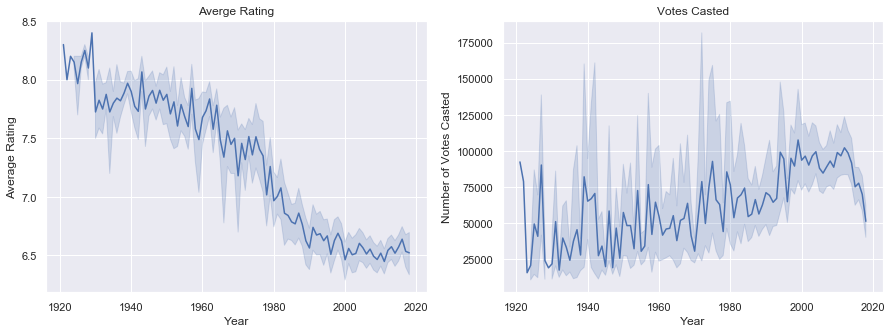

In [19]:
fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.lineplot(x=merged['startYear'],y=merged['averageRating'], ax=ax0)
ax0.set(xlabel='Year',title='Averge Rating',ylabel='Average Rating')
sns.lineplot(x=merged['startYear'],y=merged['numVotes'], ax=ax1)
ax1.set(xlabel='Year',title='Votes Casted',ylabel='Number of Votes Casted')
plt.show()
fig.savefig('avgRatingAndVotes.png')

### This is interesting - ratings were in decline from the 20's to the mid 90's. Then they took a upward trajectory until today<< So after filtering for movies with greater than 5000 votes the huge uptick dissapears. Which. Lots to unpack, possibly movies have gotten better overall (how is this influenced by number of films released?) or maybe the algorithm has change. As for votes casted probably is a function of the number of movies released. However the massive decline is interesting. Perhaps the rise of other rating sites such as rotten tomatoes has had an influence

In [11]:
genreRating = merged.groupby(['genres']).agg(['mean','median','std','count'])
genreRating = genreRating.set_axis([f"{x}-{y}" for x, y in genreRating.columns], axis=1, inplace=False).reset_index()
genreRating = genreRating[genreRating['ln_votes-count']>100].reset_index(drop=True)
genreRating = genreRating.sort_values(by='averageRating-mean',ascending=False)
genreRating = genreRating[['genres','averageRating-mean','averageRating-count']]
genreRating['ln-count'] = np.log(genreRating['averageRating-count'])
genreRating['count-cumsum'] = genreRating['averageRating-count'].cumsum()
genreRating['pct-tot-count'] = genreRating['count-cumsum']/genreRating['averageRating-count'].sum()
#genreRating = genreRating[genreRating['pct-tot-count']<.98]
genreRating.head()



,genres,averageRating-mean,averageRating-count,ln-count,count-cumsum,pct-tot-count
13,Drama,7.424000,300,5.703782,300,0.094877
10,"Crime,Drama",7.388235,102,4.624973,402,0.127135
14,"Drama,Romance",7.091339,254,5.537334,656,0.207464
12,"Crime,Drama,Thriller",7.061688,154,5.036953,810,0.256167
7,"Comedy,Drama",7.002013,298,5.697093,1108,0.350411


/Users/bradkittrell/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/bradkittrell/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/bradkittrell/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


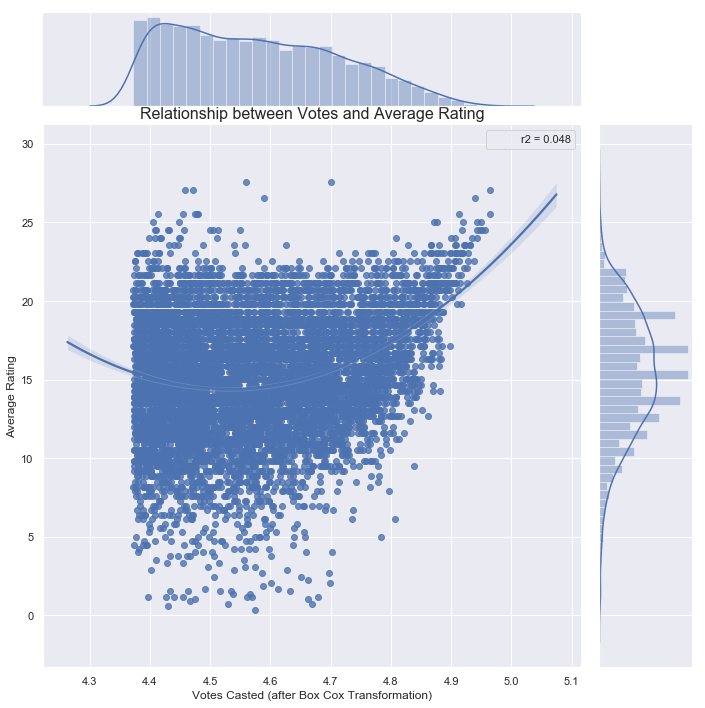

In [12]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

plt.figure(figsize=(15,15))
sns.jointplot(data=merged,x='BC-Votes',y='BC-AvgRating',kind='reg',order=2,height=10,stat_func=r2)
plt.ylabel('Average Rating')
plt.xlabel('Votes Casted (after Box Cox Transformation)')
plt.title('Relationship between Votes and Average Rating',fontsize=16)
plt.legend()
plt.show()
plt.clf()

## Generally as votes increase so does the average rating of the of the film. The regression shows an awfully low R2 value however. Nontheless, it makes sense that if a film gets more votes it it should also get a higher rating.

/Users/bradkittrell/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


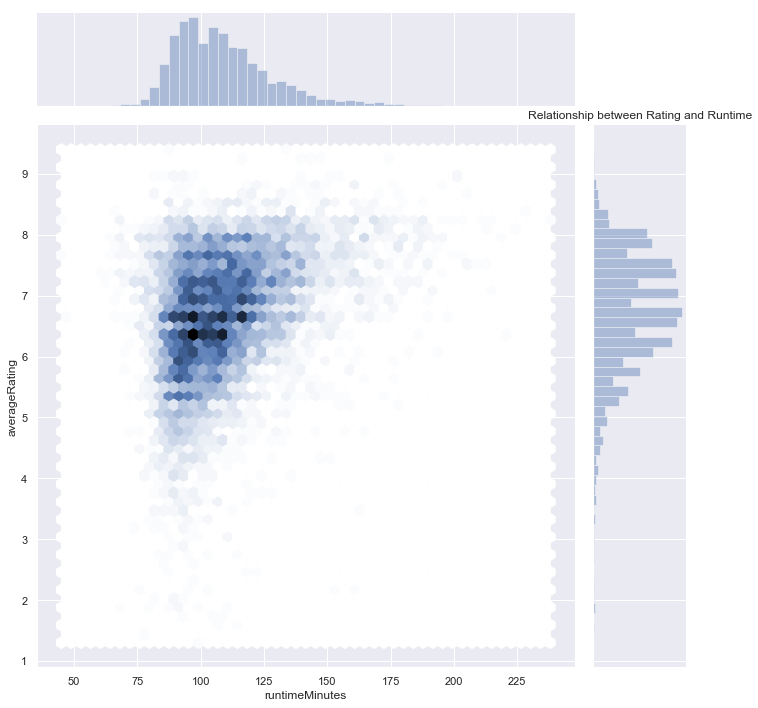

In [14]:
#lastly what about rating and film length? is there any signal

sns.jointplot(data=merged,x='runtimeMinutes',y='averageRating',kind='hex',height=10)
#plt.ylabel('Average Rating')
#plt.xlabel('Runtime in Minutes')
plt.title('Relationship between Rating and Runtime')
plt.show()
